# 연속확률변수 (주식수익률)

# statistical hypothesis testing

# Pamameter testing
###  확률분포에 대한 모수값에 대한 검정

###  기준가설 귀무가설 (이게 공정한 동전이라 하자...)

# 1. 귀무가설을 등식으로 놓는다(부등식은 안되)

# H₀ : µ = 0

# 2. 귀무가설의 반대 대립가설(연구가설)

# H₀ : 𝞱 = 0 , H₀ : 𝞱 < 0 

귀무가설과 대립가설이 완전한 반대는 아니다

# 3. P-value : 유의확률(중심에서부터의 거리측정값)
pdf는 면적이 합이 1이므로 가장자리의 면적이 1 에 가까운가 0에 가까운가 에 따라 중심에서부터의 거리를 측정

# 유의확률이 작으면 귀무가설이 틀렸다!!!!!

### 얼마나 작으면 틀린건가 1% 5% 10% 라고 정의하고 시작한다

### 유의확률이 작으면 귀무가설 기각 대립가설 채택

유의확률 계산이 복잡할경우 기각역 계산으로 결정한다

검정을 공부햇다면 어떤 데이터를 보면 검정을 통해서만 체크해보고 판단한다

데이터에 대한 검정을 해봐야한다

# Scipy 를 이용한 검정

In [6]:
# 이항검정 binom_test
N = 10
µ0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(µ0).rvs(N)
n = np.count_nonzero(x)
n

7

In [32]:
sp.stats.binom_test(n, N)
# p-value 34% , 귀무가설채택

0.3437499999999999

In [10]:
# 100번 테스트

In [34]:
# 이항검정 binom_test
N = 100
µ0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(µ0).rvs(N)
n = np.count_nonzero(x)
n

49

In [35]:
sp.stats.binom_test(n, N)
# p-value 92% , 귀무가설 채택

0.9204107626128206

In [36]:
# 
# 이항검정 binom_test
N = 100
µ0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(µ0).rvs(N)
n = np.count_nonzero(x)
n

31

In [38]:
sp.stats.binom_test(n, N)
# p-value 0.01% , 귀무가설 기각

0.00018314322488235352

# 연습문제 9.5.1

###  유의수준 1% 일때 

In [52]:
N = 10
# p-value 10% 
µ0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(µ0).rvs(N)
n = np.count_nonzero(x)
m = N-n
n, m

(7, 3)

In [50]:
for i in range(1, N+1):
    print(i, sp.stats.binom_test(i, N))

1 0.021484374999999997
2 0.10937500000000003
3 0.3437499999999999
4 0.7539062500000002
5 1.0
6 0.7539062500000002
7 0.3437499999999999
8 0.10937500000000003
9 0.021484374999999997
10 0.001953125


# answer : 2~8

In [31]:
for i in range(N+1):
    print(i, sp.stats.binom_test(i, N)>0.1)

0 False
1 False
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 False
10 False


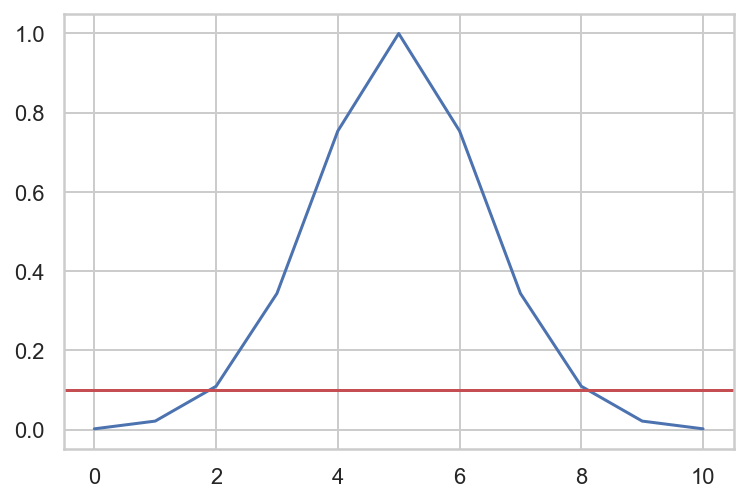

In [67]:
# xx = np.linspace(0, 10)
plt.plot([sp.stats.binom_test(i,N) for i in range(N+1)])
plt.axhline(y=0.1, color = 'r')
plt.show()
%matplotlib inline

In [69]:
N = 1000
# p-value 10% 
µ0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(µ0).rvs(N)
n = np.count_nonzero(x)

n

483

In [117]:
sp.stats.binom_test(n, N)

0.031418110233846136

In [79]:
np.where(np.array([sp.stats.binom_test(i, N) for i in range(N+1)])>0.1)
# 0~473, 527~1000

(array([474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
        487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499,
        500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
        513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
        526]),)

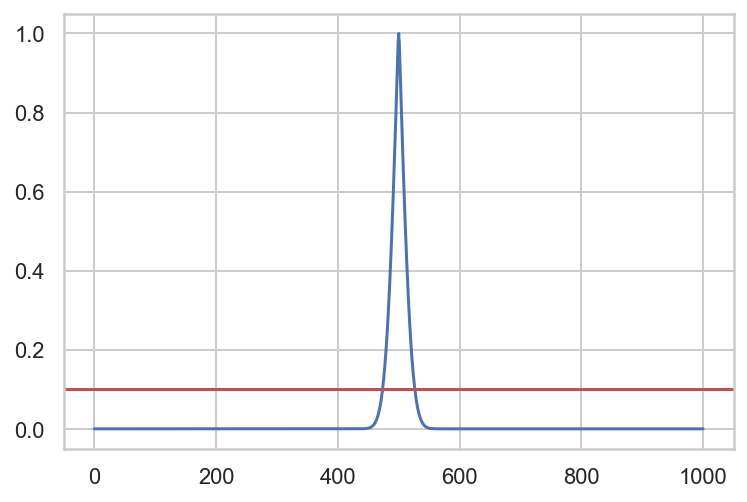

In [80]:
plt.plot([sp.stats.binom_test(i, N) for i in range(N+1)])
plt.axhline(y=0.1, color = 'r')
plt.show()

# 검정은 도구니까 사용할 수 있어야한다

# 데이터가 많이야 데이터의 결과를 신용할 수 있다

In [107]:
# 연습문제 9.5.2

# 1)

In [118]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [119]:
tips[tips.sex=='Female'].smoker.value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

In [127]:

n = tips[tips.sex=='Female'].smoker.value_counts()[1]

N = sum(tips[tips.sex=='Female'].smoker.value_counts())
n, N

(54, 87)

In [121]:
sp.stats.binom_test(n,N, alternative='greater' )

0.015709055116923068

#10% 이하이므로 귀무가설 기각

# 2)

In [123]:
tips[(tips.sex=='Female') & (tips.time=='Dinner')].smoker.value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [126]:
sum(tips[(tips.sex=='Female') & (tips.time=='Dinner')].smoker.value_counts())

52

In [128]:
n = tips[(tips.sex=='Female') & (tips.time=='Dinner')].smoker.value_counts()[1]

N = sum(tips[(tips.sex=='Female') & (tips.time=='Dinner')].smoker.value_counts())
n, N

(29, 52)

In [125]:
sp.stats.binom_test(n,N, alternative='greater' )

0.2442278346899461

# 연습문제 전체인구의 2/3 찬성문제  다시 풀어봐야함 

In [130]:
m0 = 0.7
pop = 55000000
pop2 = pop *(2/3)
pop2

36666666.666666664

In [132]:
sp.stats.binom_test(pop2,pop, alternative='greater')

0.0

# 카이제곱 검정

In [ ]:
# 예제

N = 10
mu0 = (0.25, 0.25, 0,25, 0,25)
mk = (0, 3, 5, 2)

In [133]:
N = 10
K = 4
mu0 = np.ones(K)/ K
np.random.seed(0)
x = np.random.choice(K, N, p=mu0)

In [134]:
x

array([2, 2, 2, 2, 1, 2, 1, 3, 3, 1])

In [135]:
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [137]:
sp.stats.chisquare(n)[1]

0.157724450396663

In [138]:
# 예제 

In [147]:
N = 100
mu0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p = mu0)
n = np.bincount(x, minlength=K)
n

array([28, 23, 29, 20])

In [146]:
sp.stats.chisquare(x)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

# 연습문제 9.5.4

In [148]:
N = 5
mu0 = np.ones(K)/K

x = [0,0,0,0,0,5]


In [149]:
sp.stats.chisquare(x)

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

#연습문제 정답:  0.13% 

# 연습문제 9.5.5

In [157]:
obs=(Y1,Y2)
np.array(obs)

array([[ 4, 16, 20],
       [23, 18, 19]])

In [158]:
X1 = 0
Y1 = [4, 16, 20]
X2 = 1
Y2 = [23, 18, 19]

sp.stats.chi2_contingency(np.array(obs))

(9.910060890453046,
 0.00704786570249751,
 2,
 array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

# 연습문제 9.5.6

In [163]:

x1 = [80,75, 85, 50,60, 75, 45, 70, 90,95, 85, 80]
x2 = [80, 85, 70,80,35, 55, 80]
sp.stats.ttest_ind(x1,x2, equal_var=True)

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

# 정규성검정 매우 중요!!